# Preparation

Import Libraries

In [232]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
%matplotlib inline

from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split

Get Data

In [233]:
# read data and duplicate to data olah
weather = pd.read_csv('./soal lks ai/weatherAUS.csv')
weather_olah = weather.copy()
# display dataframe
weather

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [234]:
# weatjer data types
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [235]:
# row counts
weather.shape[0]

145460

In [236]:
# column counts
weather.shape[1]

23

Check Data

In [237]:
# check null precentage
weather_olah.isna().sum() / weather_olah.shape[0] * 100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

# Preprocess

Checking features categorical or numerical

In [238]:
# get categori feature
cat_feat = [col_name for col_name in weather_olah.columns if weather_olah[col_name].dtype == "O"]
print(f"Jumlah fitur kategori {len(cat_feat)}  ")
print(f"Terdiri dari {cat_feat} ")

Jumlah fitur kategori 7  
Terdiri dari ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'] 


In [239]:
# getting numerik feature
num_feat = [col_name for col_name in weather_olah.columns if weather_olah[col_name].dtype != "O"]
print(f"Jumlah fitur numerik {len(num_feat)}  ")
print(f"Terdiri dari {num_feat} ")

Jumlah fitur numerik 16  
Terdiri dari ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'] 


In [240]:
# check kemungkinan relasi 
for col_name in cat_feat:
    count = len(weather_olah[col_name].unique())
    print(f"kemungkinan relasi column {col_name} adalah {count} ")

kemungkinan relasi column Date adalah 3436 
kemungkinan relasi column Location adalah 49 
kemungkinan relasi column WindGustDir adalah 17 
kemungkinan relasi column WindDir9am adalah 17 
kemungkinan relasi column WindDir3pm adalah 17 
kemungkinan relasi column RainToday adalah 3 
kemungkinan relasi column RainTomorrow adalah 3 


In [241]:
# mengurangi kemungkinan relasi pada tanggal
weather_olah["Date"] = pd.to_datetime(weather_olah["Date"]) # convert date to datetime

# membuat columns baru
weather_olah["Year"] = weather_olah["Date"].dt.year
weather_olah["Month"] = weather_olah["Date"].dt.month
weather_olah["Day"] = weather_olah["Date"].dt.day

# drop column date
weather_olah.drop("Date", axis = 1, inplace = True)
weather_olah.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   Evaporation    82670 non-null   float64
 5   Sunshine       75625 non-null   float64
 6   WindGustDir    135134 non-null  object 
 7   WindGustSpeed  135197 non-null  float64
 8   WindDir9am     134894 non-null  object 
 9   WindDir3pm     141232 non-null  object 
 10  WindSpeed9am   143693 non-null  float64
 11  WindSpeed3pm   142398 non-null  float64
 12  Humidity9am    142806 non-null  float64
 13  Humidity3pm    140953 non-null  float64
 14  Pressure9am    130395 non-null  float64
 15  Pressure3pm    130432 non-null  float64
 16  Cloud9am       89572 non-null   float64
 17  Cloud3pm       86102 non-null

In [242]:
# get categori feature
cat_feat = [col_name for col_name in weather_olah.columns if weather_olah[col_name].dtype == "O"]
print(f"Jumlah fitur kategori {len(cat_feat)}  ")
print(f"Terdiri dari {cat_feat} ")

Jumlah fitur kategori 6  
Terdiri dari ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'] 


In [243]:
# check null category
weather_olah[cat_feat].isna().sum()

Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [244]:
# isi missing value dgn mode
cat_null = [feat for feat in cat_feat if weather_olah[feat].isna().sum()]  # return feature kategori
for x in cat_null:
    weather_olah[x] = weather_olah[x].fillna(weather_olah[x].mode()[0])

In [245]:
# recek
weather_olah[cat_feat].isna().sum()

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [246]:
# check null numerik
num_null = weather_olah[num_feat].isnull().sum()
only_num_null = [col_name for col_name in num_feat if weather_olah[col_name].isnull().sum()]
missing_num = weather_olah[only_num_null].isnull().sum()
missing_num

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
dtype: int64

<AxesSubplot:>

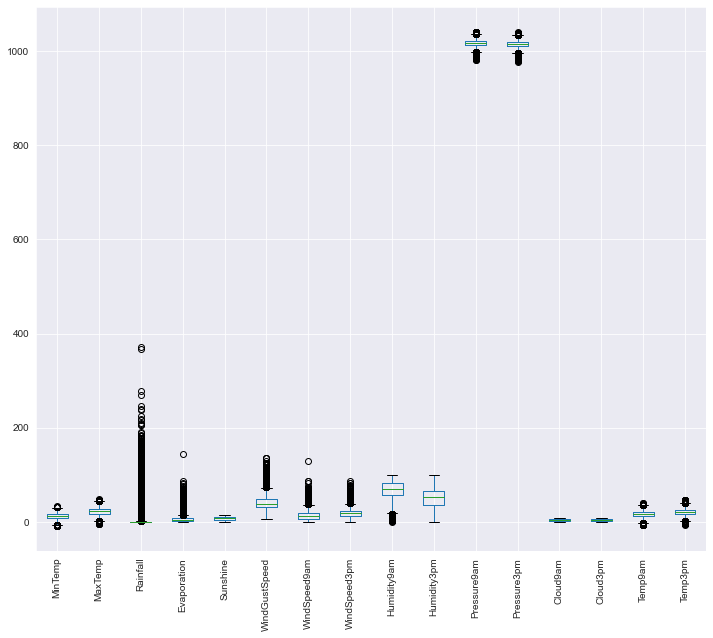

In [247]:
# cek outlier sebelum isi null value
plt.figure(figsize=(12,10))
weather_olah.boxplot(only_num_null, rot=90)

In [248]:
# isi missing value dengan mean
for col_name in only_num_null:
    weather_olah[col_name] = weather_olah[col_name].fillna(weather_olah[col_name].mean())

# cek
weather_olah[only_num_null].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

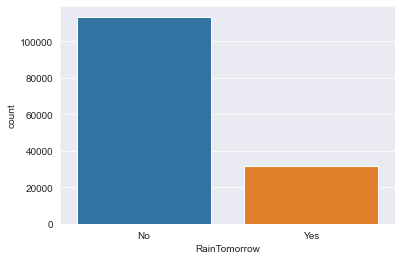

In [249]:
# melihat perbandingan raintomorrow
sns.countplot(data=weather_olah, x='RainTomorrow')

array([[<AxesSubplot:title={'center':'MinTemp'}>,
        <AxesSubplot:title={'center':'MaxTemp'}>,
        <AxesSubplot:title={'center':'Rainfall'}>,
        <AxesSubplot:title={'center':'Evaporation'}>],
       [<AxesSubplot:title={'center':'Sunshine'}>,
        <AxesSubplot:title={'center':'WindGustSpeed'}>,
        <AxesSubplot:title={'center':'WindSpeed9am'}>,
        <AxesSubplot:title={'center':'WindSpeed3pm'}>],
       [<AxesSubplot:title={'center':'Humidity9am'}>,
        <AxesSubplot:title={'center':'Humidity3pm'}>,
        <AxesSubplot:title={'center':'Pressure9am'}>,
        <AxesSubplot:title={'center':'Pressure3pm'}>],
       [<AxesSubplot:title={'center':'Cloud9am'}>,
        <AxesSubplot:title={'center':'Cloud3pm'}>,
        <AxesSubplot:title={'center':'Temp9am'}>,
        <AxesSubplot:title={'center':'Temp3pm'}>]], dtype=object)

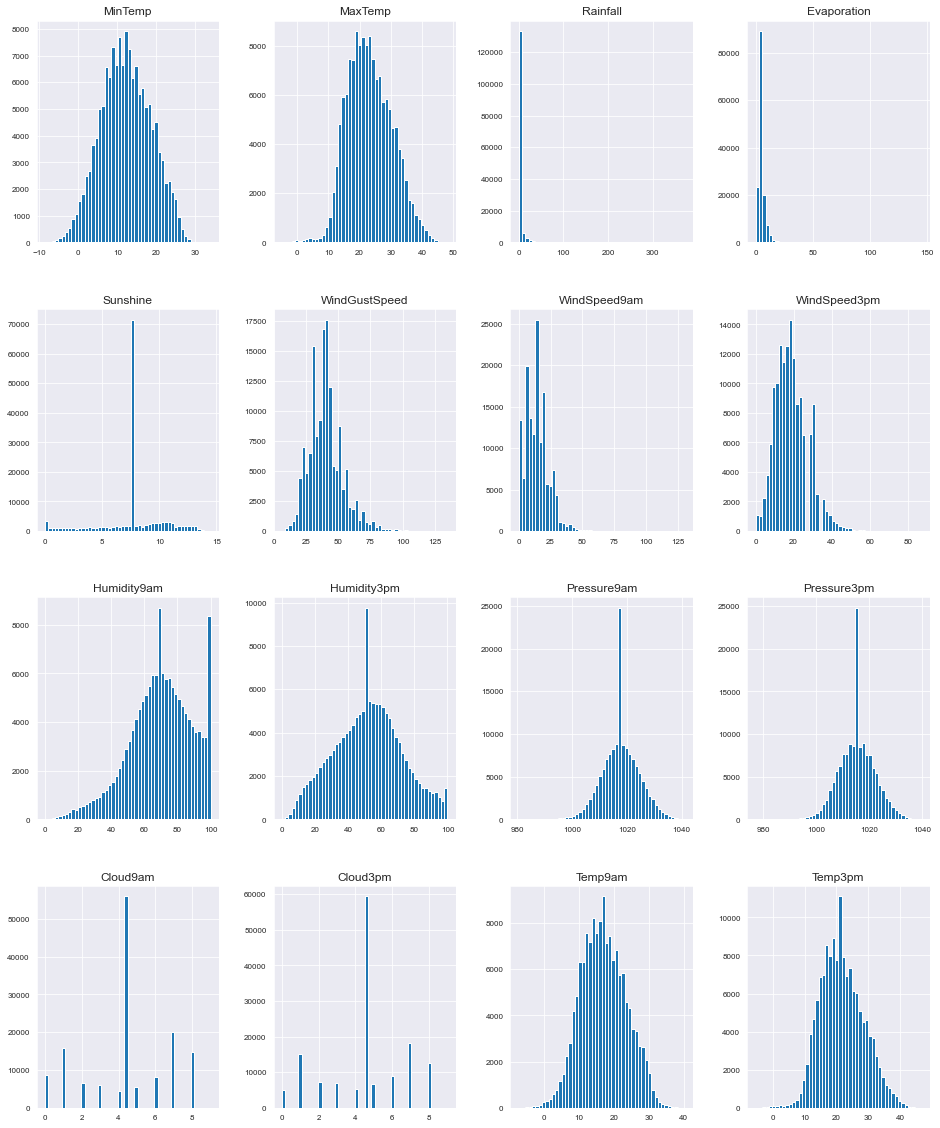

In [250]:
# visualisasi kedalam histogram
weather_olah_num = weather_olah.select_dtypes(include = ['float64'])
weather_olah_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [251]:
# get categori column
categorical = [i for i in weather_olah.columns if weather_olah[i].dtype == "O"]
categorical

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [252]:
# fungsi encoding
def encoding(feature):
    mapping = {} 
    unique = list(weather_olah[feature].unique()) # get value unik
    for index in range(len(unique)): 
        mapping[unique[index]] = index # convert ke numerik berdasarkan index
    return mapping             

# panggil fungsi
for category in categorical:
    weather_olah[category].replace(encoding(category), inplace = True)
    
weather_olah.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,0,13.4,22.9,0.6,5.468232,7.611178,0,44.0,0,0,...,1007.1,8.000000,4.50993,16.9,21.8,0,0,2008,12,1
1,0,7.4,25.1,0.0,5.468232,7.611178,1,44.0,1,1,...,1007.8,4.447461,4.50993,17.2,24.3,0,0,2008,12,2
2,0,12.9,25.7,0.0,5.468232,7.611178,2,46.0,0,1,...,1008.7,4.447461,2.00000,21.0,23.2,0,0,2008,12,3
3,0,9.2,28.0,0.0,5.468232,7.611178,3,24.0,2,2,...,1012.8,4.447461,4.50993,18.1,26.5,0,0,2008,12,4
4,0,17.5,32.3,1.0,5.468232,7.611178,0,41.0,3,3,...,1006.0,7.000000,8.00000,17.8,29.7,0,0,2008,12,5


In [253]:
y = weather_olah["RainTomorrow"]
X = weather_olah.drop(["RainTomorrow"],axis = 1)  # indepedent or input

In [254]:
# seimbangkan raintomorrow
from imblearn.over_sampling import SMOTE
smote_object = SMOTE()
# now creating x and y
X, y = smote_object.fit_resample(X, y)

In [255]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [257]:
from sklearn.ensemble import RandomForestClassifier
forest1 = RandomForestClassifier(n_estimators=200)

# training the model
forest1.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200)

In [260]:
print("Accuracy: " + str(metrics.accuracy_score(X_train, y_train, forest1)*100) +"%")

TypeError: accuracy_score() takes 2 positional arguments but 3 were given

In [ ]:
# predictions 
forest1_predictions = forest1.predict(X_test)
# akurasi
print("Accuracy: " + str(metrics.accuracy_score(y_test, forest1_predictions)*100) +"%")

Accuracy: 90.8174494871682%


In [ ]:
feature_importance

Humidity3pm      0.140433
Rainfall         0.107197
Cloud3pm         0.072020
Sunshine         0.069668
Cloud9am         0.057949
WindGustSpeed    0.051121
Pressure3pm      0.049051
Humidity9am      0.045938
Pressure9am      0.042473
Temp3pm          0.032868
MaxTemp          0.031741
MinTemp          0.031695
Temp9am          0.029391
WindSpeed3pm     0.028859
Location         0.027059
WindSpeed9am     0.026379
Day              0.023639
Evaporation      0.022269
WindGustDir      0.021909
WindDir3pm       0.020404
Month            0.020253
WindDir9am       0.018544
Year             0.018210
RainToday        0.010930
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


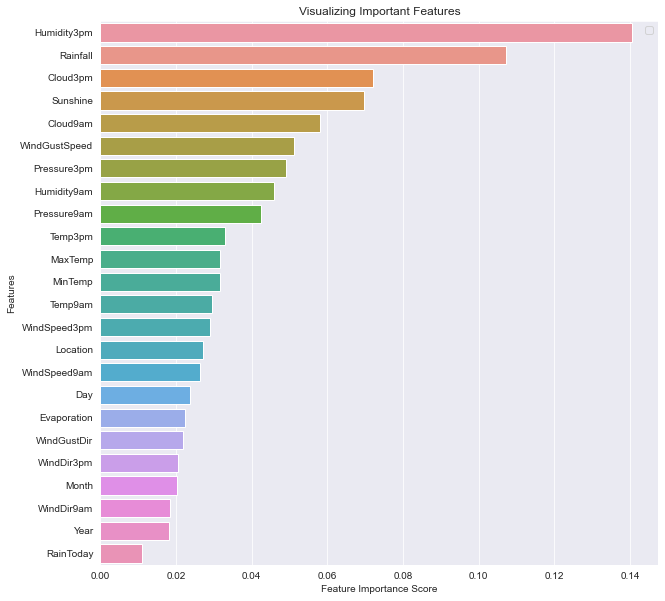

In [ ]:
feature_importance = pd.Series(forest1.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_importance

plt.rcParams["figure.figsize"] = (10, 10)
sns.barplot(x=feature_importance, y=feature_importance.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()